### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [205]:
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings



#### 1. Import the necessary packages - 2.5 marks

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(style="darkgrid")

print('Done importing packages...')




Done importing packages...


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [207]:
Data  = pd.read_csv('Data.csv')
Item = pd.read_csv('item.csv')
User  = pd.read_csv('user.csv')

print('Done reading datasets...')

# checking for first 5 rows for Data 
Data.head()


Done reading datasets...


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [23]:
Item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [24]:
User.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [208]:
# checking data shape
Data.shape


(100000, 4)

In [209]:
Item.shape

(1681, 22)

In [210]:
User.shape

(943, 5)

In [211]:
# checking for info about Data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [212]:
Item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [213]:
User.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [214]:
#describe Data
Data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [215]:
User.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [216]:
Item.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [217]:
#find missing values in Data
Data.isnull().values.any() 

False

In [218]:
User.isnull().values.any() 

False

In [219]:
Item.isnull().values.any() 

False

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [37]:
# use sum on the default axis
Item.isin([1]).sum()[3:]

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 5 marks

In [246]:
#hint: use sum on the axis = 1
Item[(Item.iloc[:,3:].isin([1]).sum(axis=1))>1]["movie title"]

0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [220]:
Item= Item.drop(Item[Item['unknown'] ==1].index)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [44]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

In [45]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


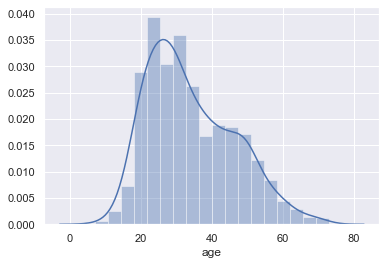

In [123]:
#age plot
User['age']
age_plot = sns.distplot(User['age'])

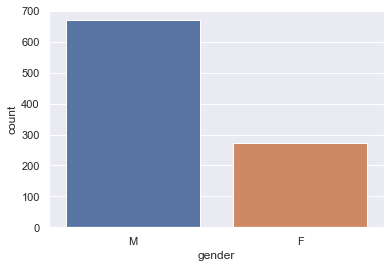

In [49]:
#gender plot
User['gender']
gender_plot = sns.countplot(x="gender", data=User)

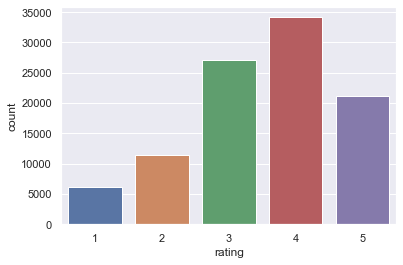

In [54]:
#ratings plot
Data['rating']
rating_plot = sns.countplot(x="rating", data=Data)

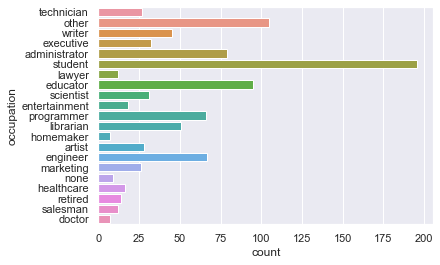

In [124]:
#occupation plot
User['occupation']
# plotted horizontally for better visualization
occupation_plot = sns.countplot(y="occupation", data=User)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 <a list of 71 Text xticklabel objects>)

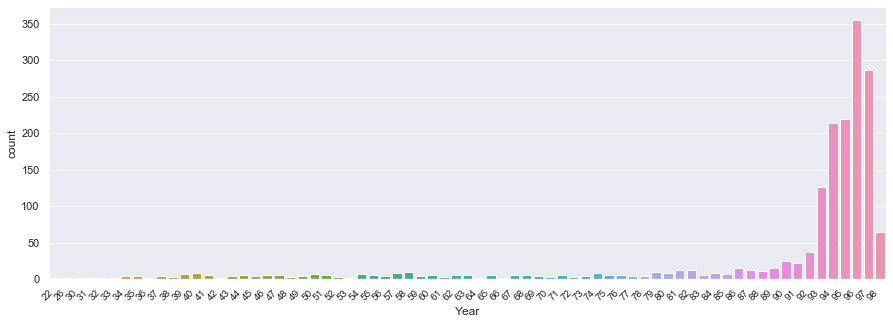

In [225]:
#release year
Item[['Date','Mon', 'Year']] = Item['release date'].str.split("-",expand=True,)
Item['Year']

plt.figure(figsize=(15,5))
release_year_plot = sns.countplot(x="Year", data=Item)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [230]:
# number of releases in a year/ genre
Item_genre= Item.iloc[:,2:]
Item_genre.groupby("Year").sum()
df_new= (Item_genre.groupby("Year").sum()).reset_index()
df_new

,Year,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,26,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,31,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,94,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
67,95,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
68,96,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2
69,97,0,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0


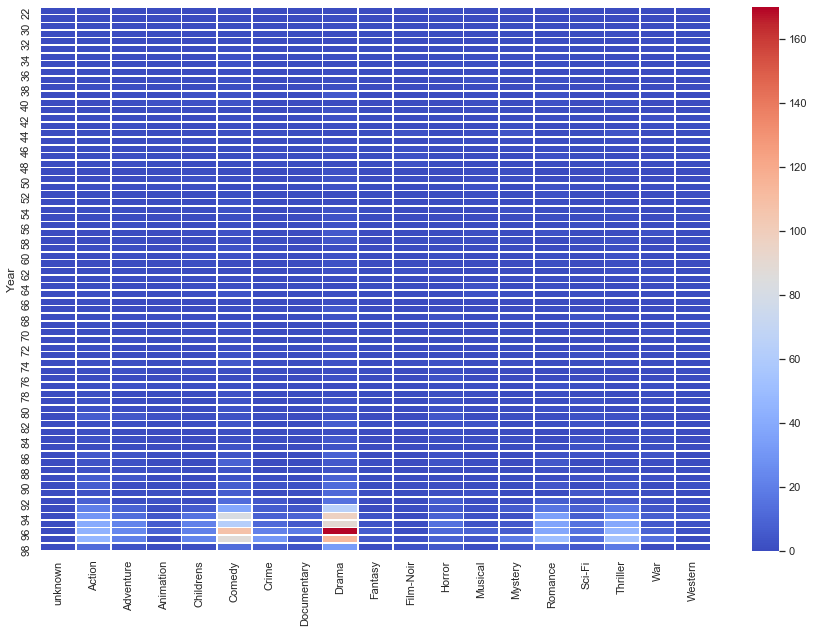

In [232]:
# popularity of genres over years
plt.figure(figsize=(15,10))
Item_Popularity= Item_genre.groupby("Year").sum()
Item_Popularity.head()

# plot the graph
sns.heatmap(Item_Popularity, cmap='coolwarm',linewidths=0.5)

# from the heatmap we can derive that the popular genres have been Drama & Comedy. 
# And to an extent Action, Romance & Thriller.
# Aroung 1996/1997 the popularity of the above genres were in peak in general for all the genres

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         71 non-null     float64
 1   unknown      71 non-null     int64  
 2   Action       71 non-null     int64  
 3   Adventure    71 non-null     int64  
 4   Animation    71 non-null     int64  
 5   Childrens    71 non-null     int64  
 6   Comedy       71 non-null     int64  
 7   Crime        71 non-null     int64  
 8   Documentary  71 non-null     int64  
 9   Drama        71 non-null     int64  
 10  Fantasy      71 non-null     int64  
 11  Film-Noir    71 non-null     int64  
 12  Horror       71 non-null     int64  
 13  Musical      71 non-null     int64  
 14  Mystery      71 non-null     int64  
 15  Romance      71 non-null     int64  
 16  Sci-Fi       71 non-null     int64  
 17  Thriller     71 non-null     int64  
 18  War          71 non-null     int64  
 19  Western   

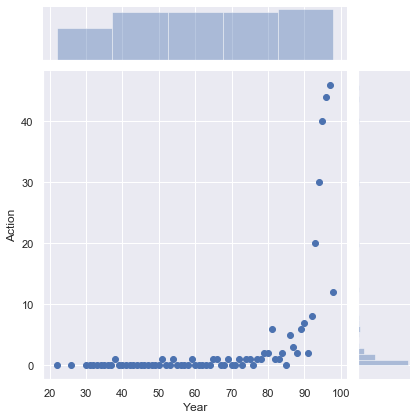

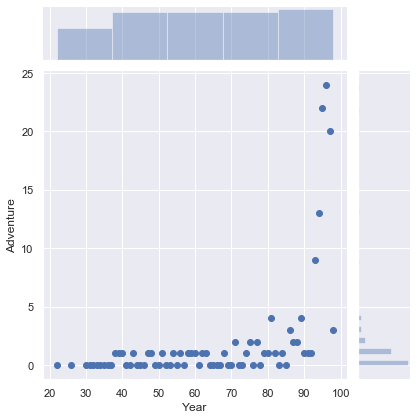

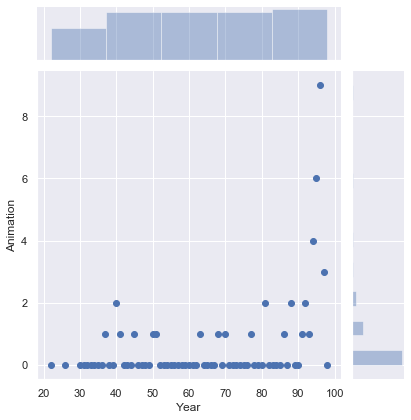

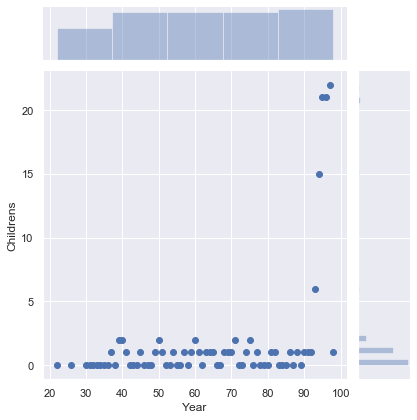

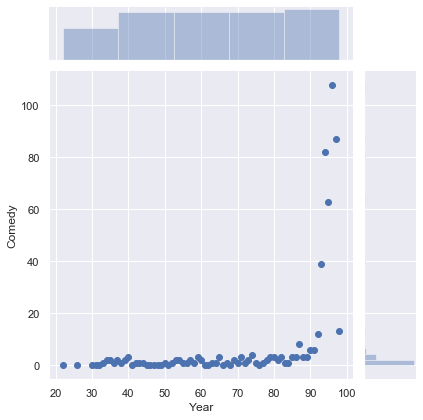

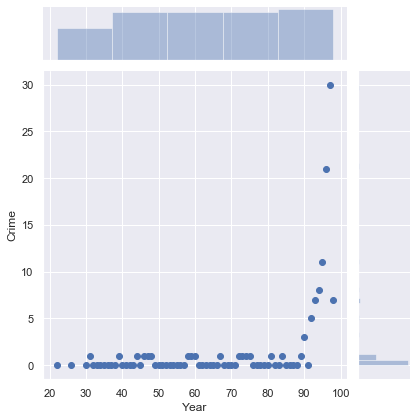

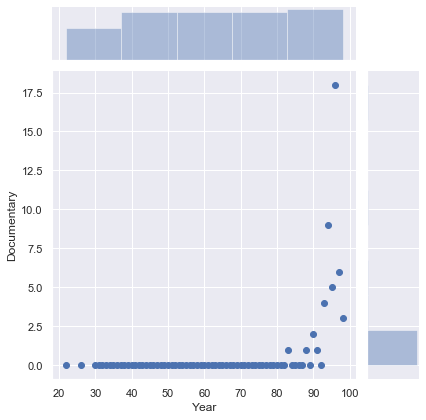

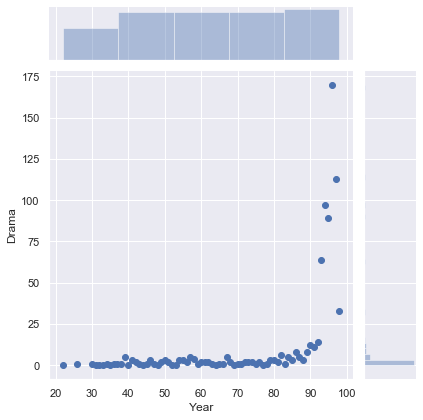

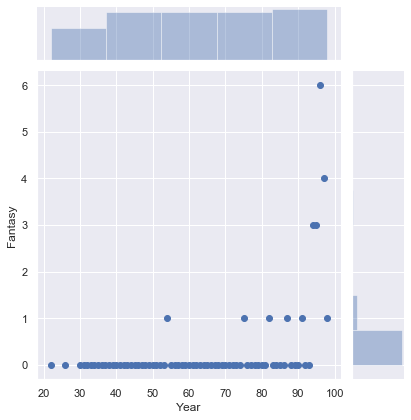

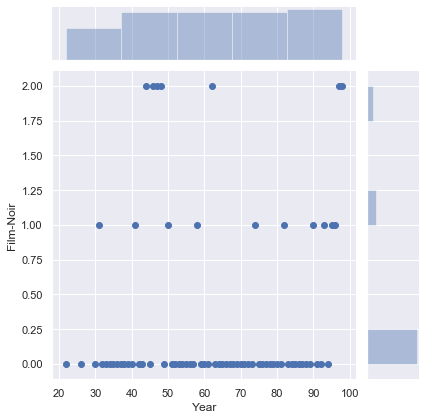

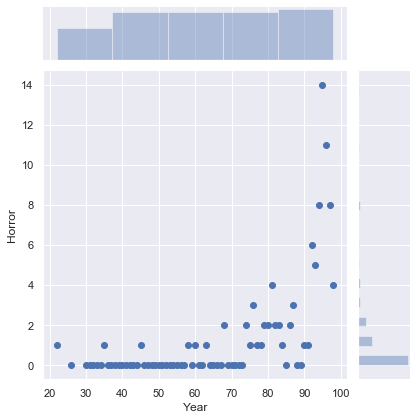

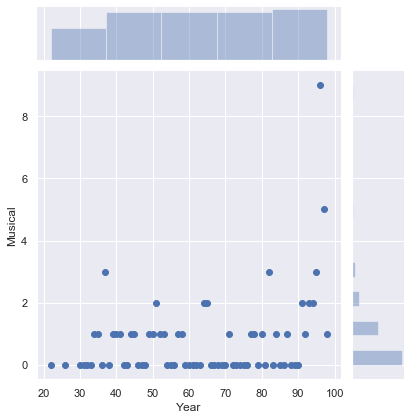

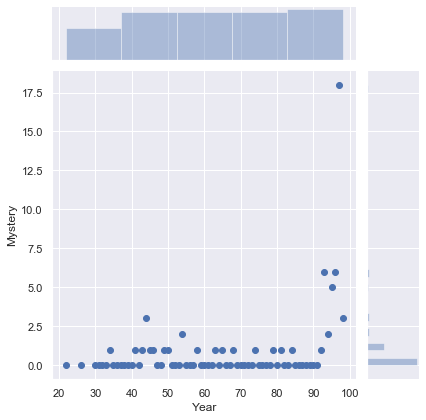

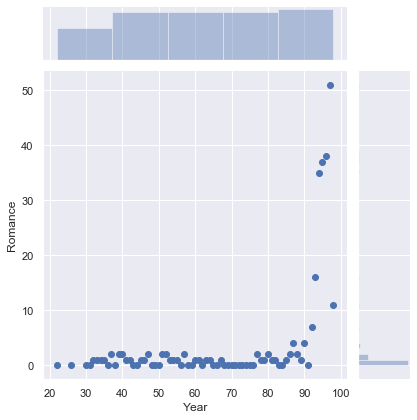

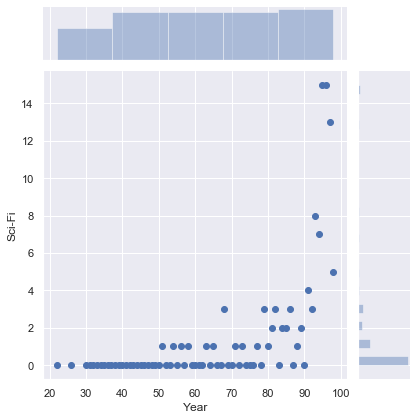

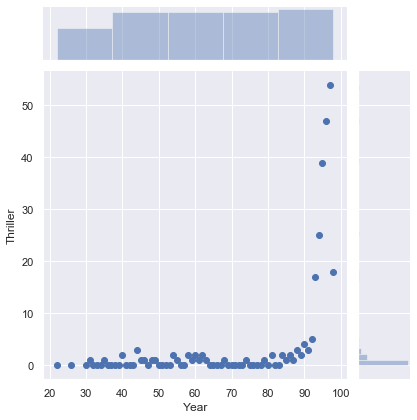

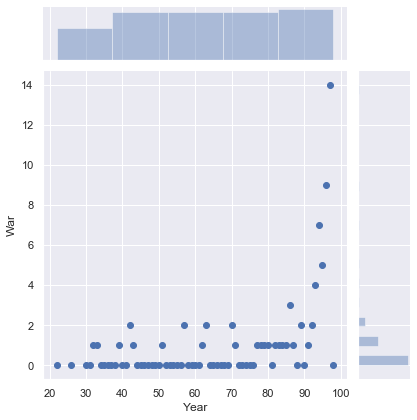

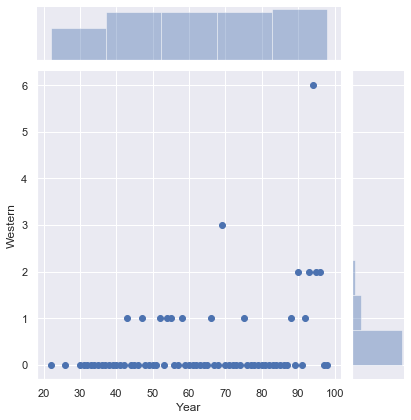

In [244]:
df_new.info()

# individual genres trend seperately plotted
df_new['Year'] = df_new['Year'].astype(float)
Action_trend=sns.jointplot("Year","Action", data=df_new )
Adventure_trend=sns.jointplot("Year","Adventure", data=df_new )

Animation_trend=sns.jointplot("Year","Animation", data=df_new )
Childrens_trend=sns.jointplot("Year","Childrens", data=df_new )

Comedy_trend=sns.jointplot("Year","Comedy", data=df_new )
Crime_trend=sns.jointplot("Year","Crime", data=df_new )

Documentary_trend=sns.jointplot("Year","Documentary", data=df_new)
Drama_trend=sns.jointplot("Year","Drama", data=df_new )

Fantasy_trend=sns.jointplot("Year","Fantasy", data=df_new)
FNoir_trend=sns.jointplot("Year","Film-Noir", data=df_new)

Horror_trend=sns.jointplot("Year","Horror", data=df_new )
Musical_trend=sns.jointplot("Year","Musical", data=df_new )

Mystery_trend=sns.jointplot("Year","Mystery", data=df_new )
Romance_trend=sns.jointplot("Year","Romance", data=df_new )

SF_trend=sns.jointplot("Year","Sci-Fi", data=df_new )
Thriller_trend=sns.jointplot("Year","Thriller", data=df_new )

War_trend=sns.jointplot("Year","War", data=df_new )
Western_trend=sns.jointplot("Year","Western", data=df_new )

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [180]:
#find movies with more than 100 ratings
Data_ratingsgt100= (Data.groupby("movie id")["rating"].count())>100
Data_ratingsgt100 = Data_ratingsgt100.to_frame().reset_index()
Data_ratingsgt100= Data_ratingsgt100[(Data_ratingsgt100['rating']==True)]
Data_ratingsgt100

,movie id,rating
0,1,True
1,2,True
3,4,True
6,7,True
7,8,True
...,...,...
925,926,True
927,928,True
1015,1016,True
1027,1028,True


In [181]:
#now get the average ratings for the above movies
new_Data= pd.merge(Data_ratingsgt100,Data,  how='inner', on=['movie id'])
new_Data= (new_Data.groupby('movie id').agg({'rating_y': ['mean']})).reset_index()
new_Data.columns= ['movie id', 'rating']
new_Data

,movie id,rating
0,1,3.878319
1,2,3.206107
2,4,3.550239
3,7,3.798469
4,8,3.995434
...,...,...
329,926,2.702970
330,928,3.115385
331,1016,3.459854
332,1028,3.040541


In [182]:
# get the top 25 rated movies
new_Data.sort_values(by='rating', ascending=True)
Datatop25 = new_Data.sort_values(by='rating', ascending=False)[0:25]
Top25Movie= pd.merge(Datatop25,Item,  how='inner', on=['movie id'])
Top25Movie['movie title']

0                                       Close Shave, A 
1                                     Schindler's List 
2                                  Wrong Trousers, The 
3                                           Casablanca 
4                            Shawshank Redemption, The 
5                                          Rear Window 
6                                  Usual Suspects, The 
7                                            Star Wars 
8                                         12 Angry Men 
9                                         Citizen Kane 
10                               To Kill a Mockingbird 
11                     One Flew Over the Cuckoo's Nest 
12                           Silence of the Lambs, The 
13                                  North by Northwest 
14                                      Godfather, The 
15                                      Secrets & Lies 
16                                   Good Will Hunting 
17                           Manchurian Candidat

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [245]:
# no. of men and women users who gave ratings

user_ratings=pd.merge(Data,User,  how='inner', on=['user id'])
ratings_gender= user_ratings.groupby('gender').agg({'user id': ['count']}).reset_index()
ratings_gender.columns = ['gender','count']
ratings_gender

# total ratings given by male & female
# F: 25740
# M: 74260

,gender,count
0,F,25740
1,M,74260


In [200]:
#Men watch more drama than women: False

# Female: 43%
# Male: 39%

movie_drama= Item[Item['Drama'] ==1]['movie id'] # pull the movie that belongs to Drama
movie_drama= movie_drama.to_frame().reset_index()
user_drama=pd.merge(movie_drama,Data,  how='inner', on=['movie id']) # get the user info watching those movie

gender_drama=pd.merge(user_drama,User,  how='inner', on=['user id']) # get the gender
gender_drama.groupby('gender').count()
# cnt= gender_drama.count() # get total users watching drama

gender_drama= gender_drama.groupby('gender').agg({'user id': ['count']}).reset_index()

gender_drama.columns = ['gender','count']

# gender_drama['perc']=gender_drama['count']/cnt[0]

gender_drama

perc_drama = pd.merge(ratings_gender,gender_drama, how='inner',on=['gender'] )
perc_drama.columns=['gender','count_total','count_genre']
perc_drama['perc']= perc_drama['count_genre']/perc_drama['count_total']

# perc_drama['perc'] = count_y/count_x
perc_drama



,gender,count_total,count_genre,perc
0,F,25740,11008,0.427661
1,M,74260,28887,0.388998


In [202]:
#Women watch more Sci-Fi than men: False

# Female: 10%
# Male: 14%

movie_scifi= Item[Item['Sci-Fi'] ==1]['movie id'] # pull the movie that belongs to Sci-Fi
movie_scifi= movie_scifi.to_frame().reset_index()
user_scifi=pd.merge(movie_scifi,Data,  how='inner', on=['movie id']) # get the user info watching those movie

gender_scifi=pd.merge(user_scifi,User,  how='inner', on=['user id']) # get the gender
gender_scifi.groupby('gender').count()
# cnt= gender_scifi.count() # get total users watching Sci-Fi

gender_scifi= gender_scifi.groupby('gender').agg({'user id': ['count']}).reset_index()

gender_scifi.columns = ['gender','count']

# gender_scifi['perc']=gender_scifi['count']/cnt[0]

gender_scifi
perc_scifi = pd.merge(ratings_gender,gender_scifi, how='inner',on=['gender'] )
perc_scifi.columns=['gender','count_total','count_genre']
perc_scifi['perc']= perc_scifi['count_genre']/perc_scifi['count_total']

# perc_drama['perc'] = count_y/count_x
perc_scifi



,gender,count_total,count_genre,perc
0,F,25740,2629,0.102137
1,M,74260,10101,0.136022


In [204]:
# Men watch more Romance than women: False
# Female: 23%
# Male: 18%

movie_Rom= Item[Item['Romance'] ==1]['movie id'] # pull the movie that belongs to Romance
movie_Rom= movie_Rom.to_frame().reset_index()
user_Rom=pd.merge(movie_Rom,Data,  how='inner', on=['movie id']) # get the user info watching those movie

gender_Rom=pd.merge(user_Rom,User,  how='inner', on=['user id']) # get the gender
gender_Rom.groupby('gender').count()
# cnt= gender_Rom.count() # get total users watching Romance

gender_Rom= gender_Rom.groupby('gender').agg({'user id': ['count']}).reset_index()

gender_Rom.columns = ['gender','count']

# gender_Rom['perc']=gender_Rom['count']/cnt[0]

gender_Rom

perc_Rom = pd.merge(ratings_gender,gender_Rom, how='inner',on=['gender'] )
perc_Rom.columns=['gender','count_total','count_genre']
perc_Rom['perc']= perc_Rom['count_genre']/perc_Rom['count_total']

perc_Rom

,gender,count_total,count_genre,perc
0,F,25740,5858,0.227584
1,M,74260,13603,0.183181
